In [2]:
using Revise
using PGFMakie
using LaTeXStrings
using Makie
using CairoMakie
using PermutedArrays

In [3]:
ls = L"hello world $\cos(x)$"
td = PGFMakie.TEXDocument(ls)

PGFMakie.TEXDocument("\\RequirePackage{luatex85}\n\n\\documentclass[preview, tightpage, 12pt]{standalone}\n\n\\usepackage{amsmath, xcolor}\n\\pagestyle{empty}\n\n\n\\begin{document}\n\nhello world \$\\cos(x)\$\n\n\\end{document}\n", 0)

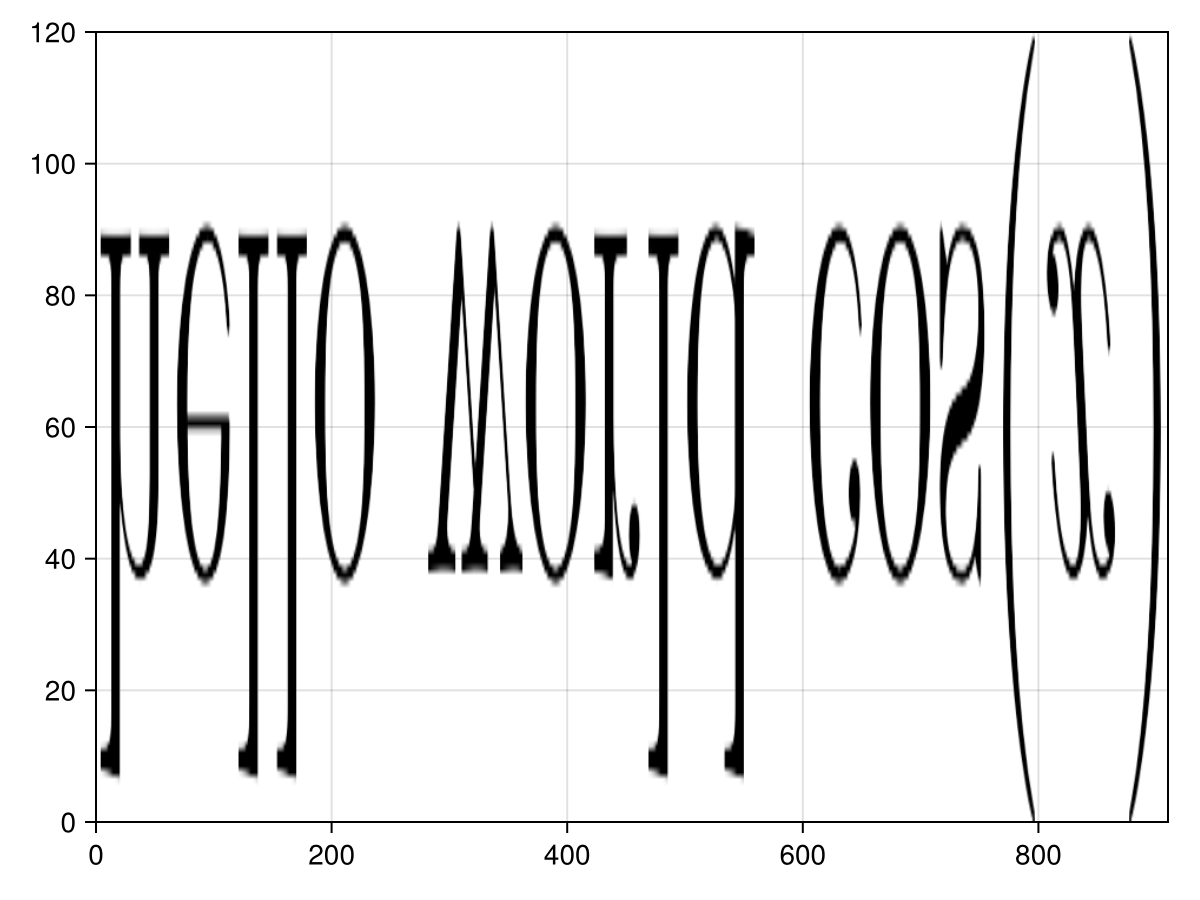

In [4]:
raster = PGFMakie.rasterize(PGFMakie.Cached(td), 20)
image(raster)

In [3]:
seconds = 0:0.1:2
measurements = [8.2, 8.4, 6.3, 9.5, 9.1, 10.5, 8.6, 8.2, 10.5, 8.5, 7.2,
        8.8, 9.7, 10.8, 12.5, 11.6, 12.1, 12.1, 15.1, 14.7, 13.1]

21-element Vector{Float64}:
  8.2
  8.4
  6.3
  9.5
  9.1
 10.5
  8.6
  8.2
 10.5
  8.5
  ⋮
  9.7
 10.8
 12.5
 11.6
 12.1
 12.1
 15.1
 14.7
 13.1

In [4]:
PGFMakie.activate!()

In [5]:
l = lines(seconds, measurements)

In [7]:
a = display(l)

In [19]:
display("image/png", a)

UndefVarError: UndefVarError: `save` not defined in `PGFMakie`
Hint: It looks like two or more modules export different bindings with this name, resulting in ambiguity. Try explicitly importing it from a particular module, or qualifying the name with the module it should come from.
Hint: a global variable of this name may be made accessible by importing FileIO in the current active module Main
Hint: a global variable of this name also exists in Makie.
Hint: a global variable of this name may be made accessible by importing Graphics in the current active module Main
Hint: a global variable of this name may be made accessible by importing Cairo in the current active module Main
Hint: a global variable of this name also exists in CairoMakie.

In [15]:
#using FileIO, ColorTypes, ImageCore, ImageShow

"""
    MyMatrixImage

A wrapper around a `Matrix{Float64}` that displays itself as a grayscale PNG
in Jupyter notebooks.
"""
struct MyMatrixImage
    data::Matrix{Float64}
end

# Plaintext fallback (used in REPL, logs, etc.)
function Base.show(io::IO, ::MIME"text/plain", x::MyMatrixImage)
    println(io, "MyMatrixImage of size ", size(x.data))
    # Print a small preview of the numbers
    show(io, MIME"text/plain"(), x.data[1:min(end,5), 1:min(end,5)])
end

# PNG representation (used in IJulia/Jupyter)
function Base.show(io::IO, ::MIME"image/png", x::MyMatrixImage)
    # Normalize matrix to 0..1 for grayscale image
    arr = x.data
    arrmin, arrmax = minimum(arr), maximum(arr)
    normed = (arr .- arrmin) ./ (arrmax - arrmin + eps())  # avoid div-by-0

    # Convert to grayscale image
    img = normed 

    # Encode to PNG and write raw bytes to `io`
    buf = IOBuffer()
    save(buf, "image/png", img)
    write(io, take!(buf))
end

# Example usage
A = randn(50, 50)                  # random matrix
wrapped = MyMatrixImage(A)         # wrap in custom type

wrapped  # In IJulia, this will display as a PNG

MyMatrixImage of size (50, 50)
5×5 Matrix{Float64}:
 -1.11714   0.263726     0.0132761  -1.20984   -0.367353
  0.798339  0.189914    -0.133179   -0.700235   0.876418
  0.738486  0.809668     0.220956   -2.01786   -1.30692
  1.42617   0.00482921   0.690792   -0.524478   1.36789
 -0.679861  1.31867      0.915382   -0.722754  -0.348131

In [16]:
display("image/png", wrapped)

MethodError: MethodError: no method matching joinpath(::IOBuffer)
The function `joinpath` exists, but no method is defined for this combination of argument types.

Closest candidates are:
  joinpath(!Matched::Base.Filesystem.DirEntry, Any...)
   @ Base file.jl:954
  joinpath(!Matched::AbstractString...)
   @ Base path.jl:346
  joinpath(!Matched::FilePathsBase.AbstractPath, Union{AbstractString, FilePathsBase.AbstractPath}...)
   @ FilePathsBase ~/.julia/packages/FilePathsBase/NV2We/src/aliases.jl:15
  ...
